## Time Series - Dock 380 (W 4th Street & 7th Avenue)
The model has been trained on the 2016 January month's data from day 1 to day 28 and tested on the 29th day's data. The data has been pre-processed using PySpark (file included on Github).

In [64]:
import pandas as pd
from matplotlib import pyplot
import pandas.tools.plotting as ts
import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [51]:
dataDir = r"C:/Ramya Dhatri/Intro To Data Science/Project/Data/Time Series/"
train_df = pd.read_csv(dataDir+'train.csv', sep='\t')
test_df = pd.read_csv(dataDir+'test.csv', sep='\t')
train_df.avail_bikes = train_df.avail_bikes.astype(float)
test_df.avail_bikes = test_df.avail_bikes.astype(float)
train_series = pd.Series(train_df['avail_bikes'].values, index=train_df['timestamp'])
test_series = pd.Series(test_df['avail_bikes'].values, index=test_df['timestamp'])

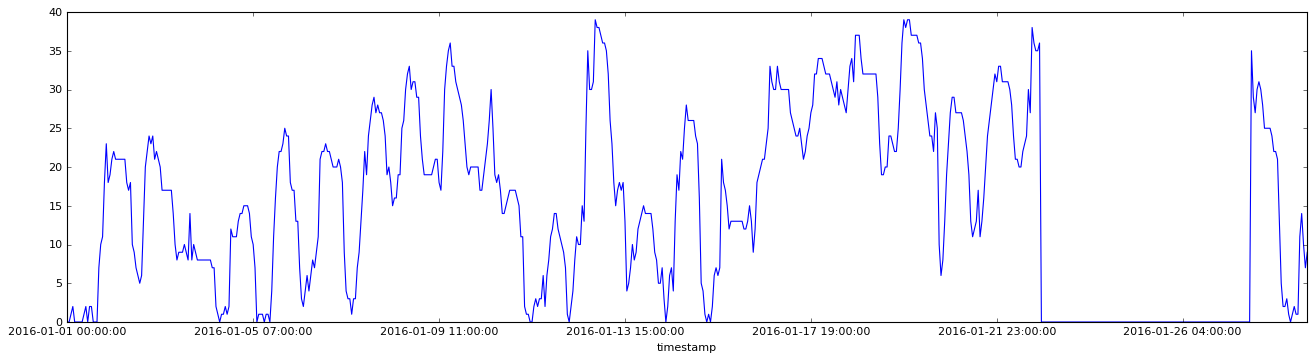

In [52]:
pyplot.figure(figsize=(20,5))
train_series.plot()
pyplot.show()

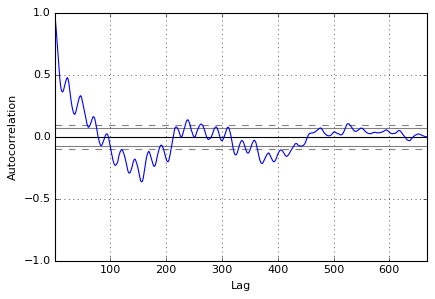

In [53]:
ts.autocorrelation_plot(train_series)
#tsa.plot_acf(train_series)
pyplot.show()

It can be seen that the ACF plot has positive correlation at lag 1. Also, it alternates between positive and negative values and finally decays to zero. Hence, an AR model would be suitable for this data.

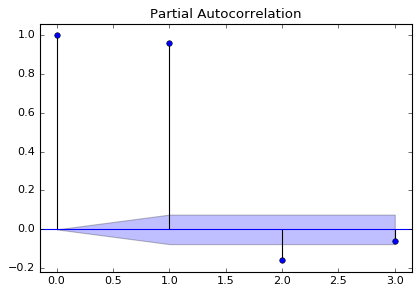

In [54]:
tsa.plot_pacf(train_series, lags=3)
pyplot.show()

As only 3 lags are significant in the PACF plot, we go ahead with fitting an AR(3) model.

predicted=9.395670, expected=10.000000
predicted=10.508670, expected=9.000000
predicted=9.184442, expected=9.000000
predicted=9.212951, expected=9.000000
predicted=9.275075, expected=9.000000
predicted=9.274567, expected=9.000000
predicted=9.274062, expected=9.000000
predicted=9.273549, expected=9.000000
predicted=9.273052, expected=0.000000
predicted=-0.682339, expected=1.000000
predicted=1.245032, expected=0.000000
predicted=0.614590, expected=1.000000
predicted=1.741038, expected=0.000000
predicted=0.610306, expected=1.000000
predicted=1.735725, expected=3.000000
predicted=3.921042, expected=11.000000
predicted=12.530869, expected=18.000000
predicted=19.472565, expected=20.000000
predicted=20.513176, expected=22.000000
predicted=22.081220, expected=26.000000
predicted=26.209508, expected=30.000000
predicted=30.163980, expected=33.000000
predicted=32.868177, expected=35.000000
predicted=34.546998, expected=34.000000
Test MSE: 9.310


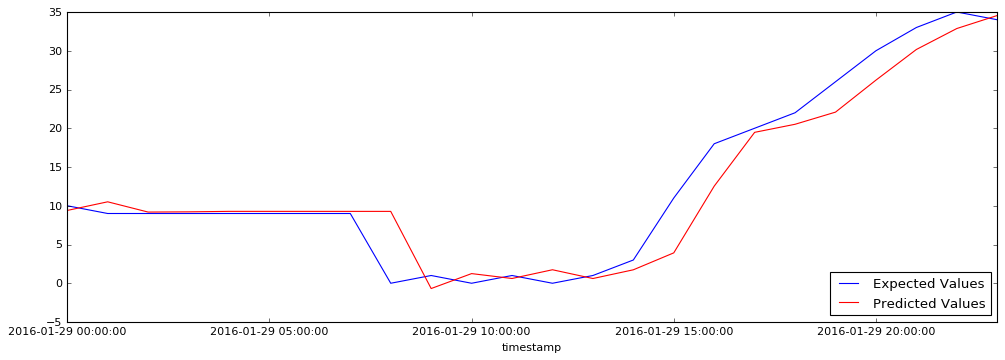

In [69]:
history = [x for x in train_series]
predictions = list()
for t in range(len(test_series)):
    model = ARIMA(history, order=(3,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_series[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_series, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(15,5))
test_series.plot(color = 'blue', label = 'Expected Values')
pyplot.plot(predictions, color='red', label = 'Predicted Values')
pyplot.legend(loc = 'lower right')
pyplot.show()